# Exploratory Data Analysis on Car Features dataset in Python
## Introduction
## What is Exploratory Data Analysis ?

### Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we understand the problem better and try to uncover hidden insights

## How to perform Exploratory Data Analysis ?
### Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this notebook you can understand some common methods and plots that would be used in the EDA process.

## What data are we exploring today ?

### The data-set can be downloaded from here. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this notebook, we will explore the data and make it ready for modeling.

## 1.1 Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


## 1.2 Loading the Dataset

In [3]:
df = pd.read_csv('car.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [4]:
print(df.shape)


(11914, 16)


In [5]:
df.columns


Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

## 1.3 Statistics of the datasets

In [6]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [7]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 2. Dropping irrelevant columns
### This step is certainly needed in EDA because sometimes there would be columns that we never use and in such cases dropping is useful. In this case, the columns such as Engine Fuel Type and Number of doors maynot be very relevant.

In [8]:
df = df.drop(['Engine Fuel Type', 'Number of Doors'], axis=1)
df.head(5)

Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels                        Market Category Vehicle Size  \
0  rear wheel drive  Factory Tuner,Luxury,High-Performance      Compact   
1  rear wheel drive                     Luxury,Performance      Compact   
2  rear wheel drive                Luxury,High-Performance      Compact   
3  rear wheel drive                     Luxury,Performance      Compact   
4  rear wheel drive                                 Luxury      Compact   

  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0         Coupe           26        19        3916  46135  
1   Convertible           28        19        3916  40650  
2         Coupe           28        20        3916  36350  
3         Coupe           28        18        3916  29450  
4   Convertible           28        18        3916  34500

## 3 Rename the columns

In [10]:
pd_df = pd.DataFrame(df)
pd_df.rename(columns={ "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"},inplace = True)

## 4 Identifying and removing null and missing data

In [13]:
df.notnull()

Make  Model  Year  Engine HP  Engine Cylinders  Transmission Type  \
0      True   True  True       True              True               True   
1      True   True  True       True              True               True   
2      True   True  True       True              True               True   
3      True   True  True       True              True               True   
4      True   True  True       True              True               True   
...     ...    ...   ...        ...               ...                ...   
11909  True   True  True       True              True               True   
11910  True   True  True       True              True               True   
11911  True   True  True       True              True               True   
11912  True   True  True       True              True               True   
11913  True   True  True       True              True               True   

       Driven_Wheels  Market Category  Vehicle Size  Vehicle Style  \
0               True             True          True           True   
1               True             True          True           True   
2               True             True          True           True   
3               True             True          True           True   
4               True             True          True           True   
...              ...              ...           ...            ...   
11909           True             True          True           True   
11910           True             True          True           True   
11911           True             True          True           True   
11912           True             True          True           True   
11913           True             True          True           True   

       highway MPG  city mpg  Popularity  MSRP  
0             True      True        True  True  
1             True      True        True  True  
2             True      True        True  True  
3             True      True        True  True  
4             True      True        True  True  
...            ...       ...         ...   ...  
11909         True      True        True  True  
11910         True      True        True  True  
11911         True      True        True  True  
11912         True      True        True  True  
11913         True      True        True  True  

[11914 rows x 14 columns]

In [14]:
pd_df.head()

Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

                         Market Category Vehicle Size Vehicle Style  MPG-H  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe     26   
1                     Luxury,Performance      Compact   Convertible     28   
2                Luxury,High-Performance      Compact         Coupe     28   
3                     Luxury,Performance      Compact         Coupe     28   
4                                 Luxury      Compact   Convertible     28   

   MPG-C  Popularity  Price  
0     19        3916  46135  
1     19        3916  40650  
2     20        3916  36350  
3     18        3916  29450  
4     18        3916  34500

In [15]:
NA_val = pd_df.isna().sum()
def na_filter(na, threshold = .4): 
    col_pass = []
    for i in na.keys():
        if na[i]/pd_df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = pd_df[na_filter(NA_val)]

df_cleaned.columns

Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Drive Mode', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'MPG-H', 'MPG-C', 'Popularity', 'Price'],
      dtype='object')

## 5 Identifying and Removing Outliers

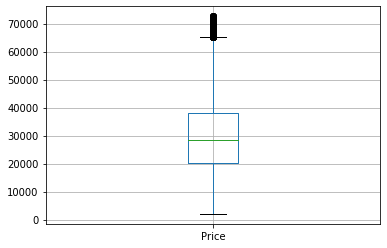

In [19]:
df_cleaned = df_cleaned[df_cleaned['Price'].between(999.99, 250000)] # Computing IQR
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR

df_filtered = df_cleaned.query('(@Q1 - 1.5 * @IQR) <= Price <= (@Q3 + 1.5 * @IQR)')
df_filtered.boxplot('Price')

## 6 Average Price among Top Car Brands